In [13]:
!pip install tensorflow==2.0.0-alpha0

In [14]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_file = "/content/drive/My Drive/Colab Notebooks/mpai.zip"

In [0]:
import zipfile

with zipfile.ZipFile(train_file, 'r') as z:
    z.extractall("/rain")

In [0]:
import os
import cv2

def load_image(file_path):
    return cv2.imread(file_path)

def extract_label(file_name):
     if "one" in file_name :
       return 1
     elif  'two'in file_name :
       return 2
     elif  'three'in file_name :
       return 3
     elif 'four' in file_name :
       return 4
     elif 'five' in file_name :
       return 5
     elif  'six' in file_name :
       return 6
     elif  'seven' in file_name :
       return 7
     elif  'eight' in file_name :
       return 8
     elif  'nine' in file_name :
       return 9
     elif  'zero' in file_name :
       return 0
     elif  'A'in file_name :
       return 10
     elif  'B'in file_name :
       return 11
     elif  'C'in file_name :
       return 12
     elif  'D'in file_name :
       return 13
     elif  'E'in file_name :
       return 14
     elif  'F'in file_name :
       return 15
     elif  'G'in file_name :
       return 16
     elif  'H'in file_name :
       return 17
     elif  'I'in file_name :
       return 18
     elif  'J'in file_name :
       return 19
     elif  'K'in file_name :
       return 20
     elif  'L'in file_name :
       return 21
     elif  'M'in file_name :
       return 22
     elif  'N'in file_name :
       return 23
     elif  'P'in file_name :
       return 24
     elif  'Q'in file_name :
       return 25
     elif  'R'in file_name :
       return 26
     elif  'S'in file_name :
       return 27
     elif  'T'in file_name :
       return 28
     elif  'U'in file_name :
       return 29
     elif  'V'in file_name :
       return 30
     elif  'W'in file_name :
       return 31
     elif  'X'in file_name :
       return 32
     elif  'Y'in file_name :
       return 33
     elif  'Z'in file_name :
       return 34
     elif  '@'in file_name :
       return 35
     elif  '#'in file_name :
       return 36
     elif  '&'in file_name :
       return 37
     elif  '$'in file_name :
       return 38
     
     
     
    

     else:
       return 39
    
       
     
train_path = "/rain/"
image_files = os.listdir(train_path)
train_images = [load_image(train_path + file) for file in image_files]
train_labels = [extract_label(file) for file in image_files]

In [0]:
import numpy as np

In [0]:
def preprocess_image(img, side=96):
    min_side = min(img.shape[0], img.shape[1])
    img = img[:min_side, :min_side]
    img = cv2.resize(img, (side,side))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img / 255.0

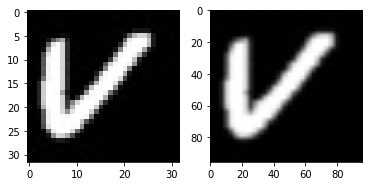

In [20]:

import matplotlib.pyplot as plt
%matplotlib inline

preview_index = 100
plt.subplot(1,2,1)
plt.imshow(train_images[preview_index])
plt.subplot(1,2,2)
plt.imshow(preprocess_image(train_images[preview_index]), cmap="gray")

In [0]:
for i in range(len(train_images)):
    train_images[i] = preprocess_image(train_images[i])

In [22]:
import numpy as np

train_images = np.expand_dims(train_images, axis=-1)
train_labels = np.array(train_labels)
print(train_images.shape, train_labels.shape)

(40040, 96, 96, 1) (40040,)


In [25]:
import tensorflow as tf
print("Tensorflow:", tf.__version__)

layers = [
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=train_images.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=40, activation=tf.nn.softmax)
]

model = tf.keras.Sequential(layers)
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])
history=model.fit(train_images, train_labels, epochs=15, batch_size=50)
model.save_weights("model.tf")

Tensorflow: 2.0.0-alpha0
Epoch 1/15
40040/40040 [==============================] - 461s 12ms/sample - loss: 0.5952 - sparse_categorical_accuracy: 0.8249
Epoch 2/15
40040/40040 [==============================] - 453s 11ms/sample - loss: 0.2235 - sparse_categorical_accuracy: 0.9251
Epoch 3/15
40040/40040 [==============================] - 452s 11ms/sample - loss: 0.1718 - sparse_categorical_accuracy: 0.9406
Epoch 4/15
40040/40040 [==============================] - 452s 11ms/sample - loss: 0.1431 - sparse_categorical_accuracy: 0.9492
Epoch 5/15
40040/40040 [==============================] - 453s 11ms/sample - loss: 0.1212 - sparse_categorical_accuracy: 0.9554
Epoch 6/15
40040/40040 [==============================] - 453s 11ms/sample - loss: 0.1029 - sparse_categorical_accuracy: 0.9637
Epoch 7/15
40040/40040 [==============================] - 450s 11ms/sample - loss: 0.0941 - sparse_categorical_accuracy: 0.9667
Epoch 8/15
40040/40040 [==============================] - 452s 11ms/sample - lo

In [26]:
print( history.history.keys())



dict_keys(['loss', 'sparse_categorical_accuracy'])


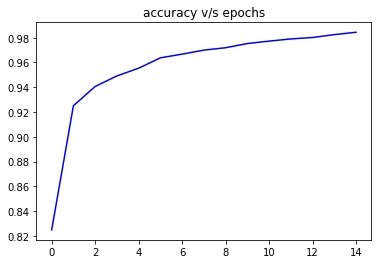

In [27]:
accuracy = history.history['sparse_categorical_accuracy']
epochs = range(len(accuracy))
plt.title("accuracy v/s epochs")
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.show()


In [34]:
from google.colab import files
uploads = files.upload()

Saving __0_40673.png to __0_40673 (2).png
Saving __0_52880.png to __0_52880 (2).png
Saving __0_106188.png to __0_106188 (2).png
Saving K (1).jpg to K (1) (2).jpg
Saving K (2).jpg to K (2) (2).jpg
Saving K (3).jpg to K (3) (2).jpg
Saving K (4).jpg to K (4) (2).jpg
Saving X (4).jpg to X (4) (2).jpg
Saving X (5).jpg to X (5) (2).jpg
Saving X (6).jpg to X (6) (2).jpg
Saving X (7).jpg to X (7) (2).jpg
Saving zero (1).jpg to zero (1) (2).jpg
Saving zero (2).jpg to zero (2) (2).jpg
Saving zero (3).jpg to zero (3) (2).jpg


In [0]:
def func(n):
  if n==1:
    return "one"
  elif n==2:
    return "two"
  elif n==3:
    return "three"
  elif n==4:
    return "four"
  elif n==5:
    return "five"
  elif n==6:
    return "six"
  elif n==7:
    return "seven"
  elif n==8:
    return "eight"
  elif n==9:
    return "nine"
  elif n==0:
    return "zero"
  elif n==10:
    return "a"
  elif n==11:
    return "b"
  elif n==12:
    return "c"
  elif n==13:
    return "d"
  elif n==14:
    return "e"
  elif n==15:
    return "f"
  elif n==16:
    return "g"
  elif n==17:
    return "h"
  elif n==18:
    return "i"
  elif n==19:
    return "j"
  elif n==20:
    return "k"
  elif n==21:
    return "l"
  elif n==22:
    return "m"
  elif n==23:
    return "n"
  elif n==24:
    return "p"
  elif n==25:
    return "q"
  elif n==26:
    return "r"
  elif n==27:
    return "s"
  elif n==28:
    return "t"
  elif n==29:
    return "u"
  elif n==30:
    return "v"
  elif n==31:
    return "w"
  elif n==32:
    return "x"
  elif n==33:
    return "y"
  elif n==34:
    return "z"
  elif n==35:
    return "@"
  elif n==36:
    return "#"
  elif n==37:
    return "&"
  elif n==38:
    return "$"
  
  else:
    return " not detected "

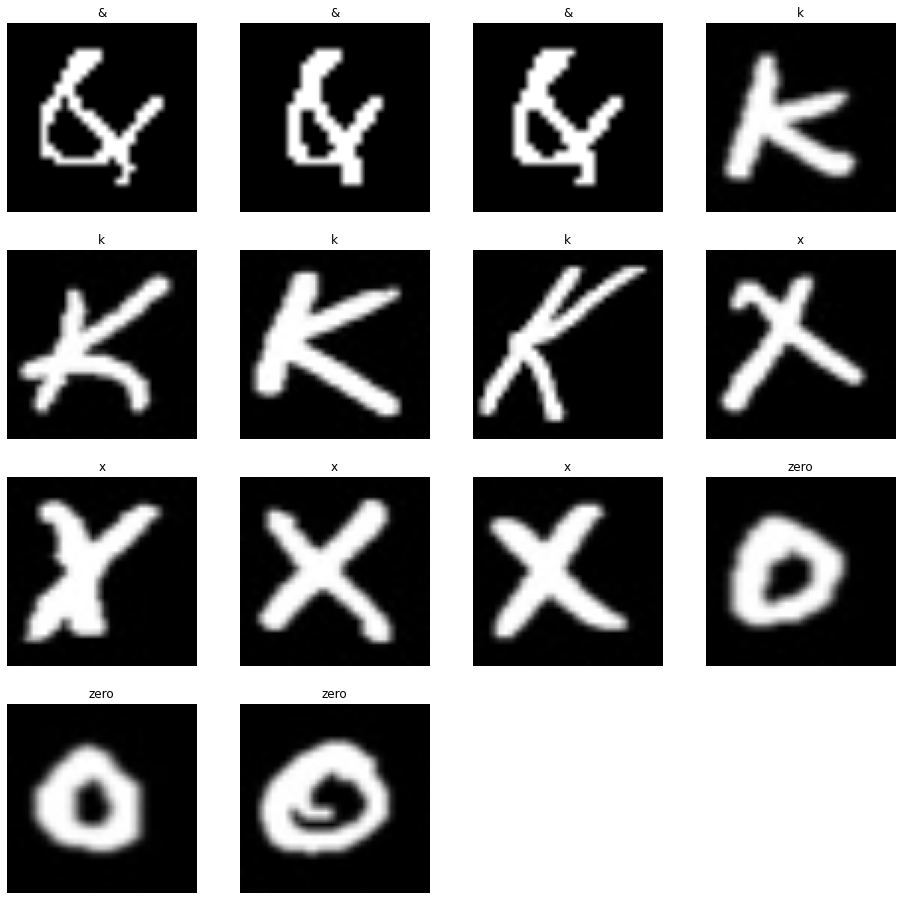

In [36]:
eval_images = [preprocess_image(load_image(file)) for file in uploads.keys()]
eval_model = tf.keras.Sequential(layers)
eval_model.load_weights("model.tf")
eval_predictions = eval_model.predict(np.expand_dims(eval_images, axis=-1))

cols = 4
rows = np.ceil(len(eval_images)/cols)
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)
for i in range(len(eval_images)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(eval_images[i], cmap="gray")
    plt.title( func(np.argmax(eval_predictions[i])) 
    )

              
    plt.axis('off')